### Coding Logistic Regression using Batch Gradient Descent from scratch for Titanic Kaggle Competition
Done mostly for the purpose of getting my hands dirty with coding since it has been a long time

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
# Imputing missing variables, especially age using knnimputer instead of dropping
imputer = KNNImputer(n_neighbors=5)
df[['Age','Fare','SibSp','Parch']] = imputer.fit_transform(df[['Age','Fare','SibSp','Parch']])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 55.8+ KB


In [12]:
df.dropna(inplace=True) # drop the rest of the rows with missing values instead of imputing as not imp

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.5+ KB


In [14]:
df = pd.get_dummies(df, columns = ['Pclass', 'Embarked', 'Sex'], drop_first=True)

In [15]:
df = df.astype(float)

In [16]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,1.0,0.0,1.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,1.0


In [17]:
scaler = StandardScaler()
df[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])

In [18]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def J(y_hat, y):
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [19]:
X = np.array(df.drop('Survived', axis=1)).T
y = np.array(df.Survived).reshape(1, len(df))
w = np.random.randn(X.shape[0], 1)
b = np.random.randn(1,1)
cost = 0
dw = np.zeros(w.shape)
db = np.zeros(b.shape)

print(X.shape, y.shape, w.shape)

(9, 889) (1, 889) (9, 1)


In [20]:
lr = 0.1
num_epochs = 100
m = y.shape[1]
costs = []
for epoch in range(num_epochs):
    # Forward pass
    z = (w.T @ X) + b      # shape (1, m)
    assert(z.shape == (1, m))
    y_hat = sigmoid(z)          # (1, m)

    # Compute cost (binary cross-entropy)
    cost = np.sum(J(y_hat, y)) / m
    costs.append(cost)

    print("Epoch:", epoch+1, end=' | ')
    print("Cost:", cost)

    # Backward pass — compute gradients
    dz = y_hat - y    # (1, m)
    dw = (X @ dz.T) / m   # (n,1)
    assert(dw.shape == w.shape)
    db = np.sum(dz) / m   # scalar (1,)

    # Parameter update
    w = w - lr * dw
    b = b - lr * db

Epoch: 1 | Cost: 1.9567934983564572
Epoch: 2 | Cost: 1.8978927865743762
Epoch: 3 | Cost: 1.8414934120092317
Epoch: 4 | Cost: 1.787631697755689
Epoch: 5 | Cost: 1.7363274180811639
Epoch: 6 | Cost: 1.6875826945609327
Epoch: 7 | Cost: 1.6413814438296495
Epoch: 8 | Cost: 1.59768943685096
Epoch: 9 | Cost: 1.5564549844598135
Epoch: 10 | Cost: 1.5176102149124715
Epoch: 11 | Cost: 1.4810728631055157
Epoch: 12 | Cost: 1.4467484544596494
Epoch: 13 | Cost: 1.4145327438826174
Epoch: 14 | Cost: 1.384314263695975
Epoch: 15 | Cost: 1.3559768430297043
Epoch: 16 | Cost: 1.3294019817421756
Epoch: 17 | Cost: 1.304470989894931
Epoch: 18 | Cost: 1.2810668344853617
Epoch: 19 | Cost: 1.2590756644821053
Epoch: 20 | Cost: 1.238388010376329
Epoch: 21 | Cost: 1.2188996739322524
Epoch: 22 | Cost: 1.2005123372215571
Epoch: 23 | Cost: 1.1831339278263628
Epoch: 24 | Cost: 1.1666787802520753
Epoch: 25 | Cost: 1.1510676332524392
Epoch: 26 | Cost: 1.136227500056765
Epoch: 27 | Cost: 1.1220914443721945
Epoch: 28 | Cost:

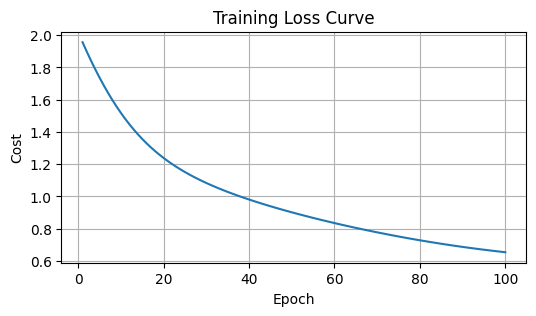

In [23]:
# Plot training loss curve
plt.figure(figsize=(6,3))
plt.plot(range(1, len(costs)+1), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

In [24]:
w, b

(array([[ 0.07892226],
        [ 0.11572141],
        [ 0.23881788],
        [-0.09978441],
        [ 0.185888  ],
        [-0.25920717],
        [ 0.43516687],
        [-1.06608861],
        [-0.08516093]]),
 array([[0.14793202]]))

In [26]:
df_test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [28]:
# remove same columns as training (keep ids separately)
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# impute numeric columns with the already-fitted KNNImputer
df_test[['Age','Fare','SibSp','Parch']] = imputer.transform(df_test[['Age','Fare','SibSp','Parch']])

# drop any remaining rows with missing values (same as training)
df_test.dropna(inplace=True)

# categorical encoding (same columns & params as training)
df_test = pd.get_dummies(df_test, columns=['Pclass','Embarked','Sex'], drop_first=True)

# match dtype and scale numeric features using the fitted scaler
df_test = df_test.astype(float)
df_test[['Age','Fare','SibSp','Parch']] = scaler.transform(df_test[['Age','Fare','SibSp','Parch']])

In [29]:
# prepare X_test in same shape as training X and compute predictions
X_test = np.array(df_test).T    # (n_features, m_test) 

# Prediction
z_test = (w.T @ X_test) + b
y_hat_test = sigmoid(z_test)
preds = (y_hat_test > 0.5).astype(int)

In [30]:
preds.shape

(1, 418)

In [33]:
df_out = pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': preds.flatten()})

In [35]:
df_out.to_csv('submission.csv', index=False)

In [35]:
# Don't have true labels for test set, but can submit the output to titanic competition on Kaggle
# https://www.kaggle.com/competitions/titanic/